# 企劃組資料

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import re
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 3000)

In [73]:
rich = pd.read_csv('rich.csv',index_col='SERIAL_NUM')
normal = pd.read_csv('normal.csv',index_col='SERIAL_NUM')
df = pd.read_csv('data_new.csv',index_col='SERIAL_NUM')

In [22]:
df = pd.read_csv('data_new.csv',index_col='SERIAL_NUM')

## Rich 

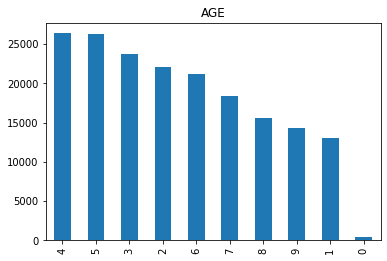

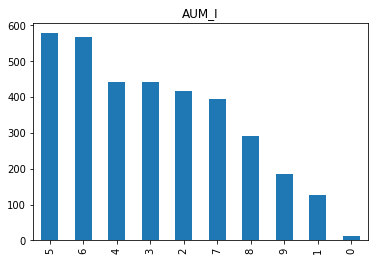

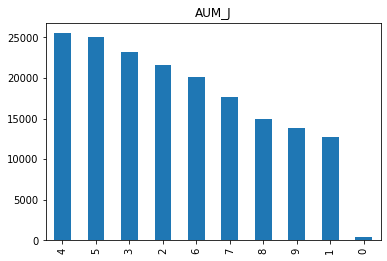

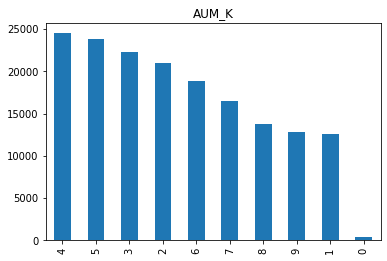

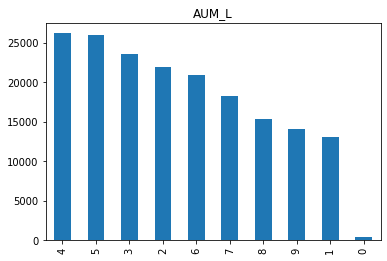

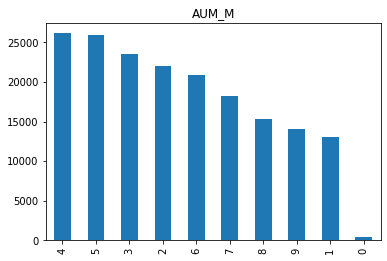

In [20]:
ax = normal['AGE'].value_counts().plot.bar()
ax.set_title('AGE')
plt.show()
for i in ['I','J','K','L','M']:
    ax =  normal[normal.loc[:,f"AUM_{i}_M1":f"AUM_{i}_M13"].eq(0).all(1)]['AGE'].value_counts().plot.bar()
    ax.set_title(f"AUM_{i}")
    plt.show()

## Normal

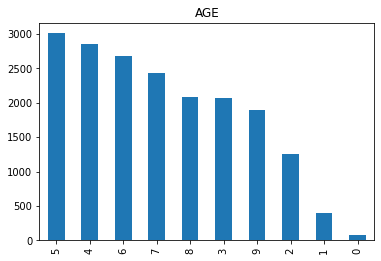

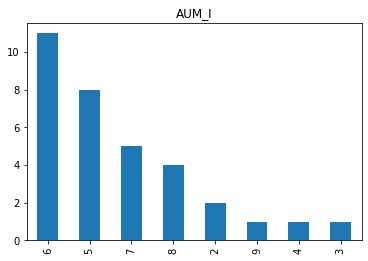

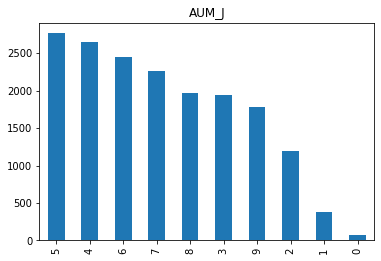

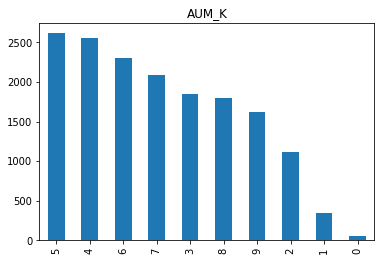

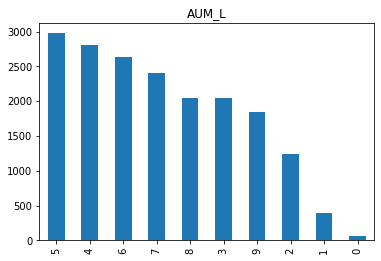

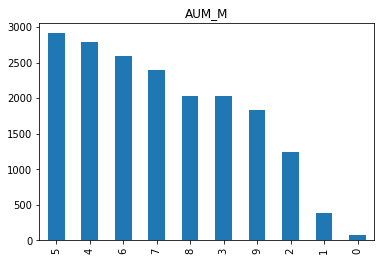

In [19]:
ax = rich['AGE'].value_counts().plot.bar()
ax.set_title('AGE')
plt.show()

for i in ['I','J','K','L','M']:
    ax =  rich[rich.loc[:,f"AUM_{i}_M1":f"AUM_{i}_M13"].eq(0).all(1)]['AGE'].value_counts().plot.bar()
    ax.set_title(f"AUM_{i}")
    plt.show()

## 換匯金額與資產關係

In [159]:
for i in ['A',"B",'C']:    
    
    # for "AMT_EXCHANGE_X_M11":"AMT_EXCHANGE_X_M13" not equal to 0
    tem = rich[~rich.loc[:,f"AMT_EXCHANGE_{i}_M11":f"AMT_EXCHANGE_{i}_M13"].eq(0).all(1)]
    
    print(f'AMT_EXCHANGE_{i}_M11 not equla zero = ', tem.shape[0])
    
    # for 'AUM_M1':"AUM_M13" not equal to 0
    tem = tem[~tem.loc[:,'AUM_M11':"AUM_M13"].eq(0).all(1)]
    
    print('=======================================')
    for j in ['I','J','K','L','M']:
        print('----------------------------------------')
        print(f'AUM_{j} not equal to zero = ',tem[~tem.loc[:,f"AUM_{j}_M11":f"AUM_{j}_M13"].eq(0).all(1)].shape[0])
        print('----------------------------------------')
    
    

CNT_EXCHANGE_A_M11 not equla zero =  451
----------------------------------------
AUM_I not equal to zero =  451
----------------------------------------
----------------------------------------
AUM_J not equal to zero =  57
----------------------------------------
----------------------------------------
AUM_K not equal to zero =  143
----------------------------------------
----------------------------------------
AUM_L not equal to zero =  22
----------------------------------------
----------------------------------------
AUM_M not equal to zero =  29
----------------------------------------
CNT_EXCHANGE_B_M11 not equla zero =  1315
----------------------------------------
AUM_I not equal to zero =  1315
----------------------------------------
----------------------------------------
AUM_J not equal to zero =  265
----------------------------------------
----------------------------------------
AUM_K not equal to zero =  258
----------------------------------------
---------------

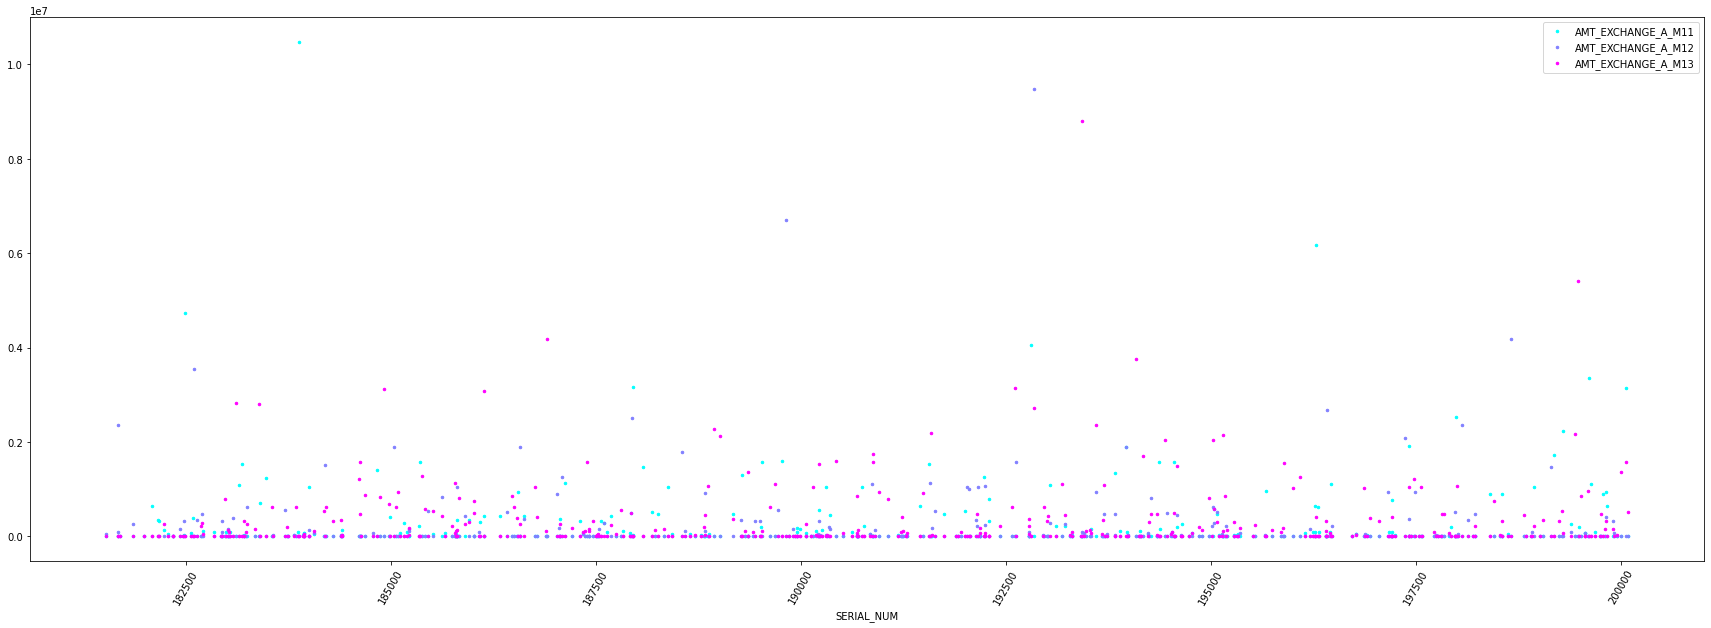

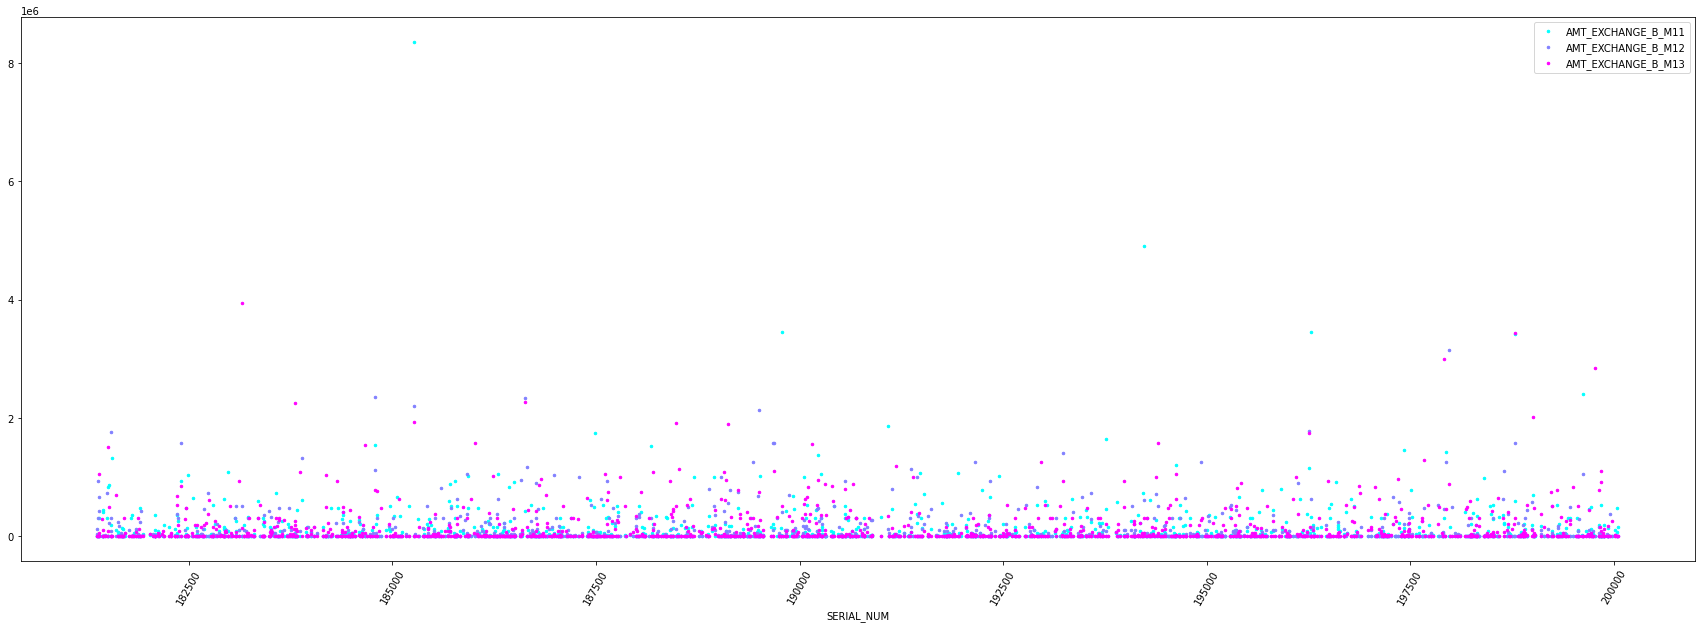

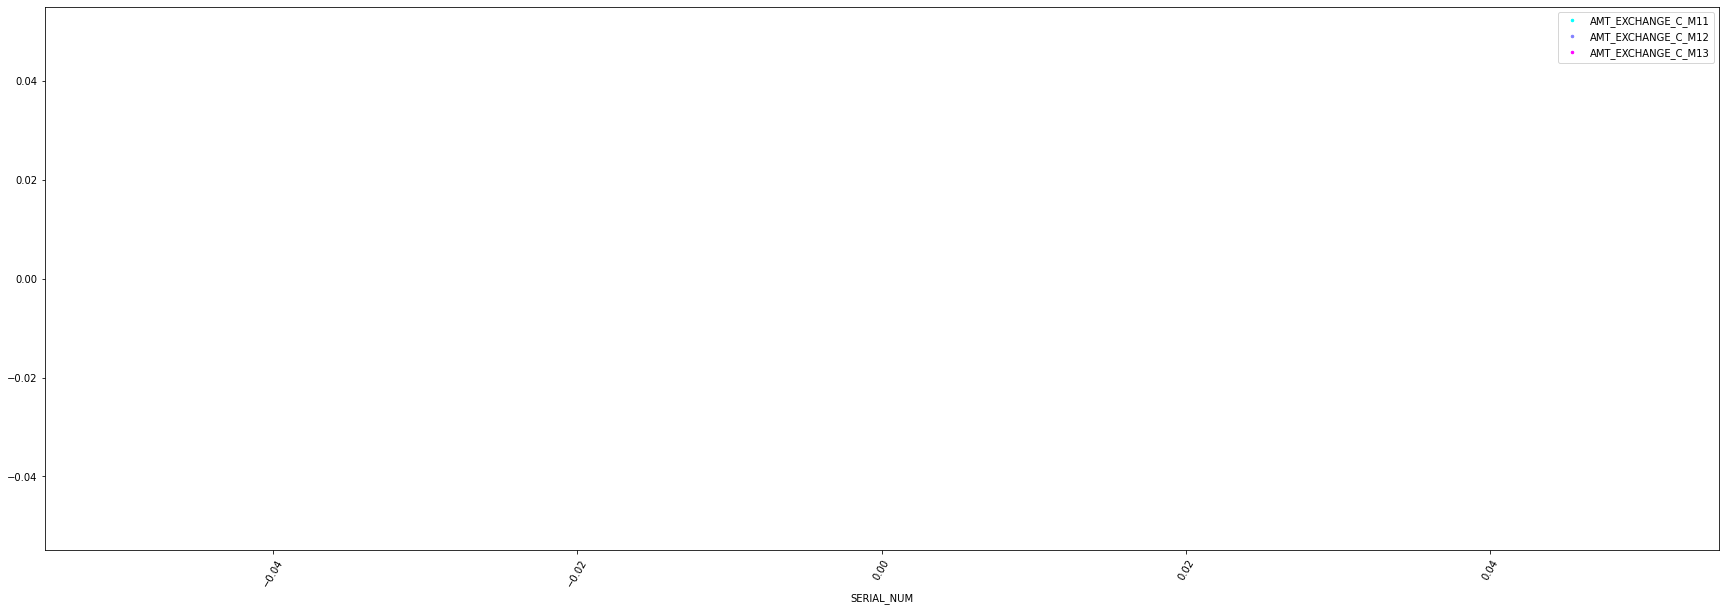

In [131]:
for i in ['A',"B",'C']:
    rich[~rich.loc[:,f"AMT_EXCHANGE_{i}_M11":f"AMT_EXCHANGE_{i}_M13"].eq(0).all(1)].loc[:,f"AMT_EXCHANGE_{i}_M11":f"AMT_EXCHANGE_{i}_M13"].plot(style='.',figsize=(30,10),markersize=5,rot=60,colormap='cool')

In [127]:
for i in ['A',"B",'C']:
    print(rich[~rich.loc[:,f"CNT_EXCHANGE_{i}_M11":f"CNT_EXCHANGE_{i}_M13"].eq(0).all(1)].loc[:,f"CNT_EXCHANGE_{i}_M11":f"CNT_EXCHANGE_{i}_M13"].shape[0])

451
1315
0


<AxesSubplot:xlabel='SERIAL_NUM'>

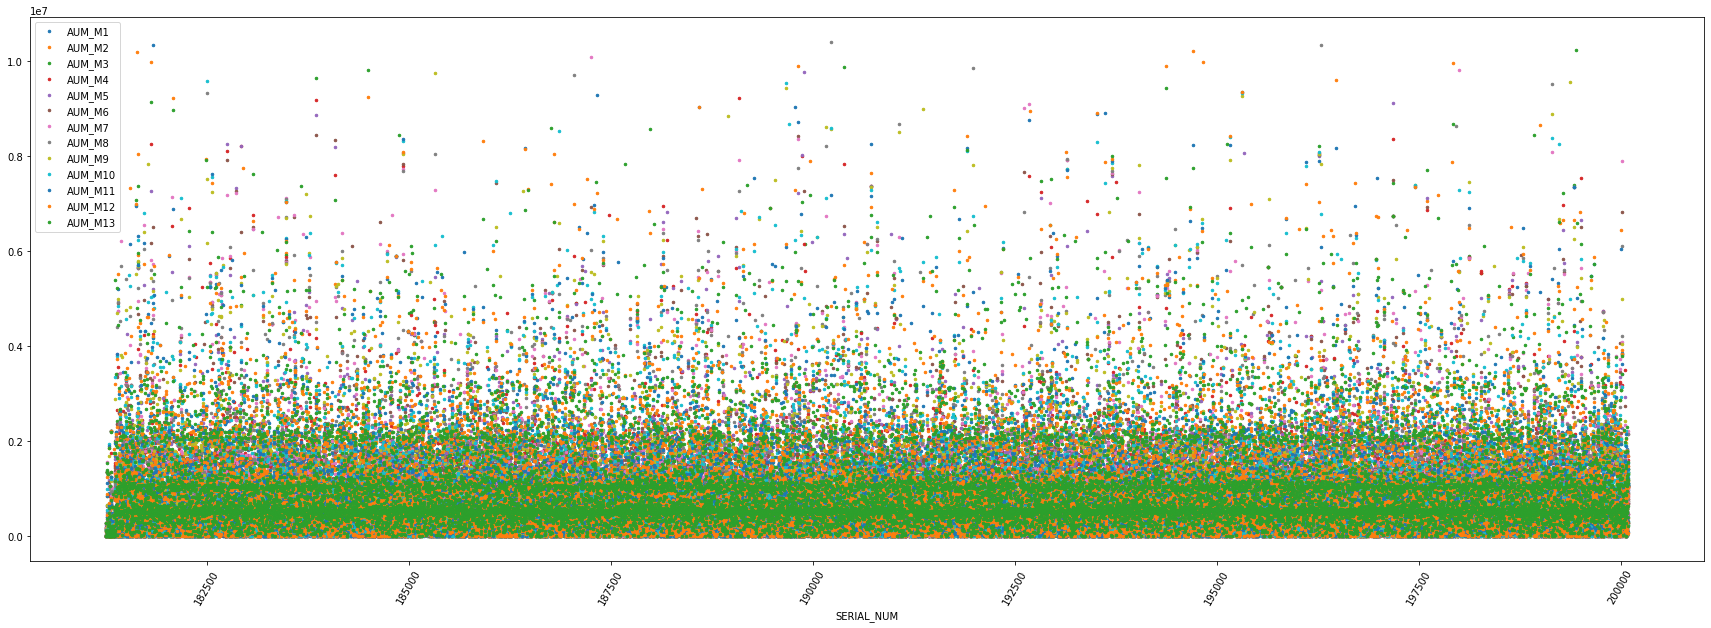

In [112]:
df.iloc[181250:,-13:].replace(0,np.nan).plot(style='.',figsize=(30,10),markersize=5,rot=60)

In [91]:
def cv(x):
    try:
        value = x.std()/x.mean()
    except ZeroDivisionError:
        value = 0
        
    return value

def max_min(x):
    value = x.max() - x.min()
    return value

In [109]:
tem = df.iloc[:,-13:]
tem = tem.loc['181200':'181500',:'AUM_M13']
tem['cv'] = tem.apply(cv,axis=1)
tem['maxmin'] = tem.apply(max_min,axis=1)

C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
tem.isnull().sum()

AUM_M1     0
AUM_M2     0
AUM_M3     0
AUM_M4     0
AUM_M5     0
AUM_M6     0
AUM_M7     0
AUM_M8     0
AUM_M9     0
AUM_M10    0
AUM_M11    0
AUM_M12    0
AUM_M13    0
cv         5
maxmin     0
dtype: int64

In [105]:
tem[tem['cv'].isnull()]

,AUM_M1,AUM_M2,AUM_M3,AUM_M4,AUM_M5,AUM_M6,AUM_M7,AUM_M8,AUM_M9,AUM_M10,AUM_M11,AUM_M12,AUM_M13,cv,maxmin
SERIAL_NUM,,,,,,,,,,,,,,,
181026,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0
181060,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0
181104,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0
181121,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0
181212,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0


In [110]:
tem[tem['cv']>0]

,AUM_M1,AUM_M2,AUM_M3,AUM_M4,AUM_M5,AUM_M6,AUM_M7,AUM_M8,AUM_M9,AUM_M10,AUM_M11,AUM_M12,AUM_M13,cv,maxmin
SERIAL_NUM,,,,,,,,,,,,,,,
181200,775663,774150,685492,560841,525459,514736,579945,626039,612119,559799,275753,107468,162373,0.408603,7.756626e+05
181201,350929,379470,444423,533503,521088,487201,431765,379182,280901,194040,183853,198035,214763,0.362157,5.335026e+05
181202,864131,956454,868748,852240,837499,839313,813499,788517,803413,774129,776820,769620,824929,0.061928,9.564539e+05
181203,20158,15560,22389,34212,39046,46171,49902,56114,60051,36946,42610,60513,57876,0.370216,6.051263e+04
181204,253265,285982,330680,343761,350631,187145,131745,131876,132084,132084,132084,132084,132084,0.449620,3.506306e+05
181205,92523,127728,103070,81788,90948,71485,61627,57323,60569,71190,41819,36729,25604,0.400593,1.277276e+05
181206,120807,64102,71171,41428,13041,12762,12762,12771,12785,12785,12785,12785,12785,1.070166,1.208059e+05
181207,439130,439997,446855,446086,440971,451191,451506,451896,452322,452717,471364,474390,474657,0.027475,4.746570e+05
181208,58175,66128,60512,51756,56111,52074,48095,42637,39683,39885,43316,39573,34839,0.197518,6.612780e+04


In [113]:
df.shape

(200092, 330)